In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [36]:
data=pd.read_csv('FraudTransactionsLog.csv',sep=',')
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [38]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [39]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [40]:
isFraudCount=data['isFraud'].value_counts()[0]/len(data['isFraud'])*100
notFraudCount=data['isFraud'].value_counts()[1]/len(data['isFraud'])*100
print("No Frauds Percentage:",isFraudCount)
print("Frauds Percentage:",notFraudCount)
#data is highly imbalanced dataset
#gpt solution used(Undersampling of Majority class)

No Frauds Percentage: 99.87091795518198
Frauds Percentage: 0.12908204481801522


['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


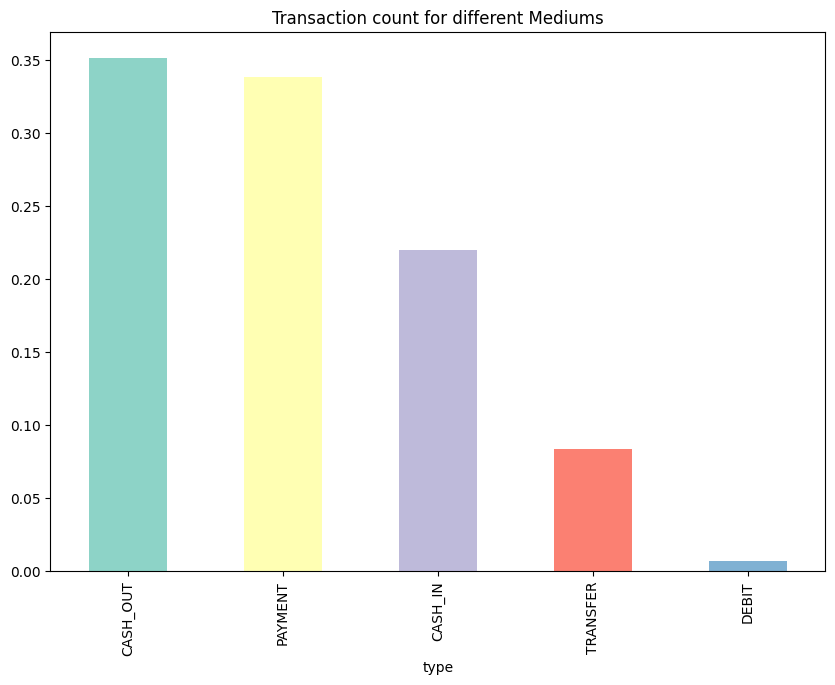

In [41]:
print(data["type"].unique())
barColors = sns.color_palette("Set3", len(data['type'].unique()))
fig = plt.figure(figsize =(10, 7))
data['type'].value_counts(normalize=True).plot(kind='bar',color=barColors)
plt.title('Transaction count for different Mediums')
plt.show()

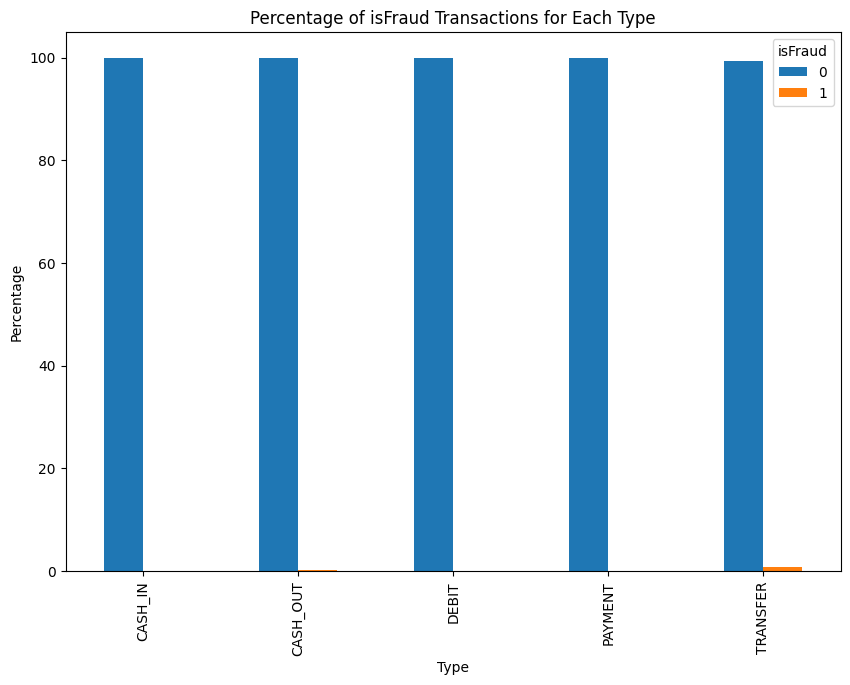

In [42]:
# #attempt 1
# fraud_counts = data.groupby(['type', 'isFraud']).size().unstack()
# # Plot the counts for each type
# barColors = sns.color_palette("Set3", len(data['type'].unique()))
# fraud_counts.plot(kind='bar', stacked=True, figsize=(10, 7),color=barColors)

# # Adding labels and title
# plt.xlabel('Type of Transaction')
# plt.ylabel('Count')
# plt.title('Count of Fraud Transactions for Each Type')

# plt.show()

total_counts = data['type'].value_counts()

# Calculate the percentage of 'isFraud' for each 'type'
fraud_percentage = (data.groupby(['type', 'isFraud']).size() / total_counts) * 100
fraud_percentage = fraud_percentage.unstack().fillna(0)

# Plot the percentage for each type
fraud_percentage.plot(kind='bar', stacked=False, figsize=(10, 7))

# Add labels and title
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.title('Percentage of isFraud Transactions for Each Type')

plt.show()

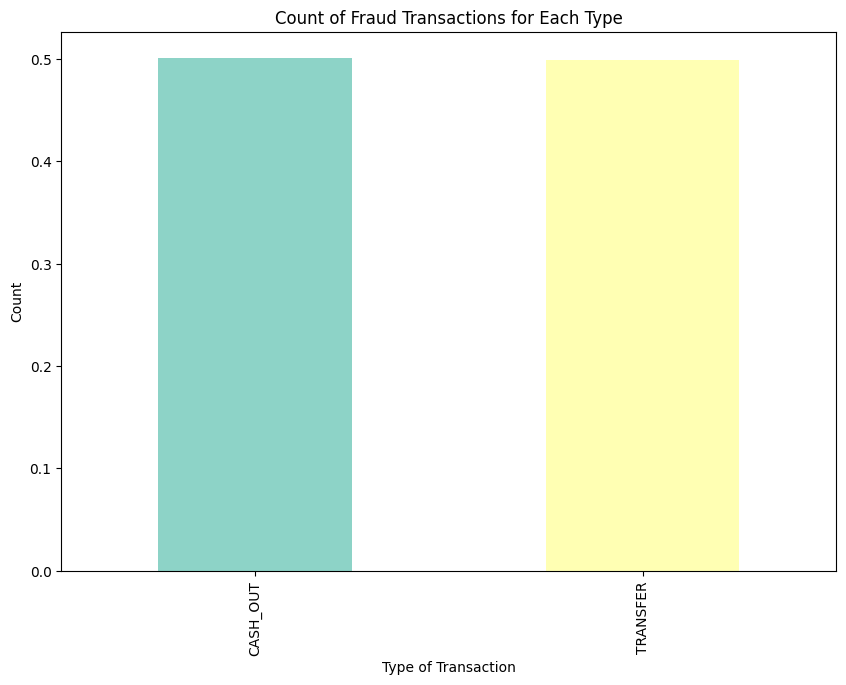

In [43]:
#attempt 2 partial done

fraud_data = data[data['isFraud'] == 1]
barColors = sns.color_palette("Set3", len(data['type'].unique()))
# Group by 'type' and count the occurrences
fraud_counts = fraud_data['type'].value_counts(normalize=True)

# Plot the counts for each type
fraud_counts.plot(kind='bar', figsize=(10, 7),color=barColors)

# Adding labels and title
plt.xlabel('Type of Transaction')
plt.ylabel('Count')
plt.title('Count of Fraud Transactions for Each Type')

plt.show()

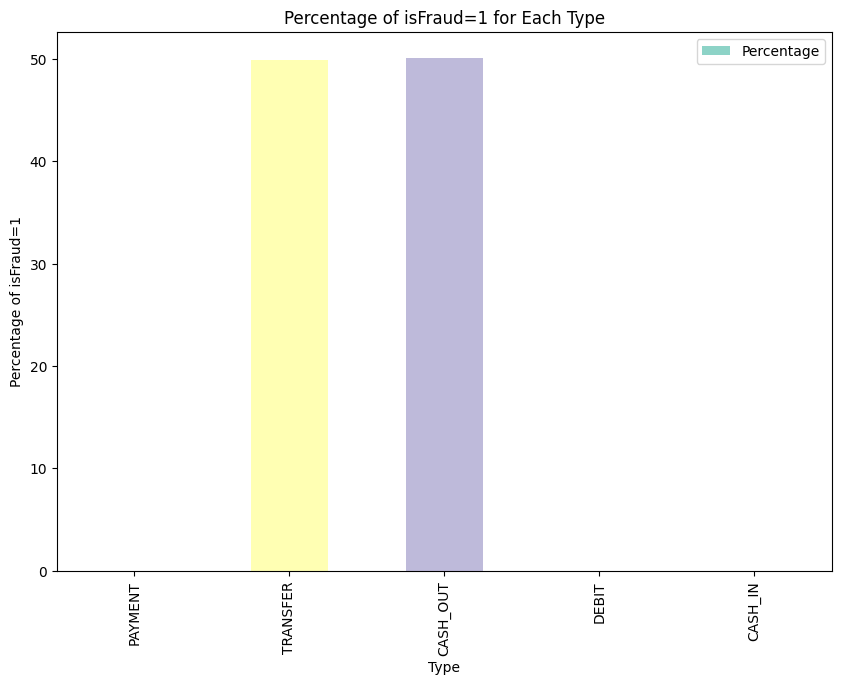

In [44]:
#correct Attempt

# Calculate the percentage of isFraud=1 for each type
fraud_percentage = (data[data['isFraud'] == 1].groupby('type').size() / data[data['isFraud'] == 1].shape[0]) * 100
barColors = sns.color_palette("Set3", len(data['type'].unique()))
# Create a DataFrame with all unique types
unique_types = pd.DataFrame(data['type'].unique(), columns=['type'])

# Merge with the percentages
fraud_percentage_df = pd.merge(unique_types, fraud_percentage.reset_index(), on='type', how='left')
fraud_percentage_df.rename(columns={0: 'Percentage'}, inplace=True)
fraud_percentage_df['Percentage'].fillna(0, inplace=True)

# Plot the percentages for each type
fraud_percentage_df.plot(kind='bar', x='type', y='Percentage', figsize=(10, 7),color=barColors)

# Add labels and title
plt.xlabel('Type')
plt.ylabel('Percentage of isFraud=1')
plt.title('Percentage of isFraud=1 for Each Type')

plt.show()


In [45]:
concisedData=data.copy()
concisedData = concisedData.loc[data['type'].isin(['CASH_OUT', 'TRANSFER']),:]
print('The new data now has ', len(concisedData), ' transactions.')
#63 lakh down to 27 lakh

The new data now has  2770409  transactions.


In [46]:
#were transacted amount is 0 those are all Fraud Transaction
print('Number of transactions where the transaction amount is Zero: ' +
str(sum(data['amount'] == 0)))


Number of transactions where the transaction amount is Zero: 16


In [47]:
data['origBalance_inacc'] = (data['oldbalanceOrg'] - data['amount']) - data['newbalanceOrig']
data['destBalance_inacc'] = (data['oldbalanceDest'] + data['amount']) -data['newbalanceDest']

In [48]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origBalance_inacc,destBalance_inacc
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,0.000000e+00,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,0.000000e+00,1864.28
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,0.000000e+00,181.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,0.000000e+00,21363.00
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,0.000000e+00,11668.14
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,0.000000e+00,7817.71
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,0.000000e+00,7107.77
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,0.000000e+00,7861.64
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,-1.353360e+03,4024.36
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,-7.275958e-12,6886.98


In [49]:
# Removing name columns
data = data.drop(['nameOrig', 'nameDest'], axis=1)

In [50]:
# Creating dummy variables through one hot encoding for 'type' column
data = pd.get_dummies(data, columns=['type'], prefix=['type'])


In [51]:
#standardizing data
std_scaler = StandardScaler()
data_scaled =pd.DataFrame(std_scaler.fit_transform(data.loc[:,~data.columns.isin(['isFraud'])]))
data_scaled.columns = data.columns[:-1]
data_scaled['isFraud'] = data['isFraud']

In [52]:
X = data_scaled.loc[:, data_scaled.columns != 'isFraud']
y = data_scaled.loc[:, data_scaled.columns == 'isFraud']
X_train_original, X_test_original, y_train_original, y_test_original =train_test_split(X,y,test_size = 0.3, random_state = 0)
label_encoder = LabelEncoder()
y_train_original = label_encoder.fit_transform(y_train_original.values.ravel())
y_test_original = label_encoder.fit_transform(y_test_original.values.ravel())

In [53]:
#To check the class imbalance and the percentage of fraudulent transactions in the train and test datasets,
train_fraud_percentage = (sum(y_train_original) / len(y_train_original)) * 100
test_fraud_percentage = (sum(y_test_original) / len(y_test_original)) * 100

print("Percentage of fraud transactions in the training set: {:.2f}%".format(train_fraud_percentage))
print("Percentage of fraud transactions in the test set: {:.2f}%".format(test_fraud_percentage))


Percentage of fraud transactions in the training set: 0.13%
Percentage of fraud transactions in the test set: 0.13%


In [54]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

scr = 'recall'
skf = StratifiedKFold(5)
accuracy_dict = {}
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()


In [55]:
from sklearn.model_selection import cross_val_score

sc_lr = cross_val_score(model_lr, X_train_original, y_train_original, cv=skf,
scoring=scr)

print(sc_lr)


c:\Users\Samual\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Samual\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

[0.48835203 0.50215703 0.48921484 0.47799827 0.49309154]


In [56]:
model_lr.fit(X_train_original,y_train_original)

y_pred_lr = model_lr.predict(X_test_original)

In [57]:
from sklearn.metrics import accuracy_score, classification_report
print("Logistic Regression classification report: \n\n"  ,classification_report(y_test_original,y_pred_lr))

Logistic Regression classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       0.99      1.00      0.99      2419

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786



In [58]:
model_dt.fit(X_train_original,y_train_original)
y_pred_dt = model_dt.predict(X_test_original)

print("Decision Tree Classification report: \n\n"  ,classification_report(y_test_original,y_pred_dt))

Decision Tree Classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       0.99      1.00      0.99      2419

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786



In [59]:
model_rf.fit(X_train_original,y_train_original)
y_pred_rf = model_rf.predict(X_test_original)

print("Random Forest Classification report: \n\n"  ,classification_report(y_test_original,y_pred_rf))

Random Forest Classification report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       0.99      1.00      0.99      2419

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786



In [60]:
#XG Boosing

In [61]:
print("Logistic Regression Accuracy Score:", accuracy_score(y_test_original,y_pred_lr))
print("Decision Tree Accuracy Score: ", accuracy_score(y_test_original,y_pred_dt))
print("Random Forest accuracy score: ", accuracy_score(y_test_original,y_pred_rf))

Logistic Regression Accuracy Score: 0.9992655017377537
Decision Tree Accuracy Score:  0.999986378776877


Random Forest accuracy score:  0.9999942371748326


In [2]:
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
gb = GradientBoostingClassifier()
gb.fit(X_train_original,y_train_original)

y_pred_gb = gb.predict(X_test_original)

NameError: name 'X_train_original' is not defined